# Лабораторная работа 6
## Задание 6.1
Дана формула численного дифференцирования 
$\newline$
$$f'(x) \approx\frac{af(x) + bf(x + 10h) + cf(x - 7h) + df(x - 8h)}{h}$$
$\newline$
Требуется исследовать поведение погрешностей при численном дифференцировании.
Найдем коэффициенты a, b, c, d, при которых наша функция численного дифференцирования имела максимальный порядок точности.

Для оценки погрешности $$r(x,h) = f'(x) - \frac{af(x) + bf(x + 10h) + cf(x - 7h) + df(x - 8h)}{h}$$ воспользуемся разложением Тейлора:
$$f(x\pm h) = f(x) \pm f'(x)h + \frac{f''(x)}{2!}h^2 + \frac{f'''(x)}{3!}h^3 + ...$$
$$f'(x) -\frac{af(x) + bf(x + 10h) + cf(x - 7h) + df(x - 8h)}{h} 
= f'(x) - a\frac{f(x)}{h} - b\frac{f(x) + f'(x)10h + \frac{f''(x)}{2!}(10h)^2 + \frac{f'''(x)}{3!}(10h)^3 + \frac{f^{(4)}(x)}{4!}(10h)^4}{h} - c\frac{f(x) - f'(x)7h + \frac{f''(x)}{2!}(7h)^2 - \frac{f'''(x)}{3!}(7h)^3 + \frac{f^{(4)}(x)}{4!}(7h)^4}{h} - d\frac{f(x) - f'(x)8h + \frac{f''(x)}{2!}(8h)^2 - \frac{f'''(x)}{3!}(8h)^3 + \frac{f^{(4)}(x)}{4!}(8h)^4}{h} = $$

$$f(x)\frac{-a -b  -c -d}{h} + f'(x)(1 - 10b - 7c - 8c) + f''(x)h(-50b -\frac{49c}{2}  -32d) + f'''(x)h^2(-\frac{1000b}{6} - \frac{343c}{6} - \frac{256d}{6}) + f^{(4)}(x)h^3(-\frac{10000b}{24} -\frac{2401c}{24}-\frac{4096d}{24})$$

$$
\begin{equation*}
    \begin{cases}
    a + b + c + d = 0     \\
    10b - 7c - 8d = 1 \\
    100b + 49c + 64d = 0\\
    1000b - 343c - 256d = 0
    \end{cases}
\end{equation*}  
$$

Данная система имеет решение
$$
\begin{equation*}
    \begin{cases}
        a = -0.118 \\
        b = 0.07 \\
        c = 0.672 \\
        d =-0.625
    \end{cases}
\end{equation*}  
$$ 

Таким образом, $$f'(x) \approx\frac{-0.118f(x) + 0.07f(x + 10h) + 0.672f(x - 7h) -0.625f(x - 8h)}{h}$$ имеет третий порядок точности. $\newline$
Также в этой задаче используем функцию правой разностной производной.
$$f'(x) = \frac{f(x+h) - f(x)}{h}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.linalg import solve
# решим систему уравнений для нахождения оптимальных коэффициентов формулы дифференцирования
A = np.array([
    [1, 1, 1, 1],
    [0, 10, -7, -8],
    [0, 100, 49, 64],
    [0, 1000, -343, -256]
])
b = np.array([0, 1, 0, 0])
coeff = solve(A, b)
print('вектор коэффиентов формулы дифференцирования: {}'.format(coeff))

вектор коэффиентов формулы дифференцирования: [-0.11785714  0.07058824  0.67226891 -0.625     ]


In [3]:
# дифференцируемые функции и их аналитически решенные производные
def f1(x):
    return -2.9 * x - 0.9 * x ** 2 + 0.4 * x ** 3 + 1.9 * x ** 4 - 4.2 * x ** 5

def df1_an(x):
    return -2.9 - 1.8 * x + 1.2 * x ** 2 + 7.6 * x ** 3 - 21. * x ** 4

def f2(x):
    return 4 * np.sin(2**x)

def df2_an(x):
    return 4 * 2**x * np.log(2) * np.cos(2**x) 

In [4]:
from sympy import diff, Symbol, sin, cos
x = Symbol('x')
diff(4 * sin(2**x), x)

4*2**x*log(2)*cos(2**x)

In [5]:
# заданная формула численного дифференцирования
def df(x, h, f=f1):
    return (-33/280 * f(x) + 6/85 * f(x + 10*h) + 80/119 * f(x - 7*h) -0.625 *f(x - 8*h)) / h

In [6]:
# правая разностная производная
def r_derivative(x, h, f=f1):
    return (f(x + h) - f(x)) / h

In [7]:
# левая разностная производная
def l_derivative(x, h, f=f1):
    return (f(x) - f(x - h)) / h

Построим графики функций аналитически вычисленной производной, заданной функции дифференцирования и правой разностной производной.

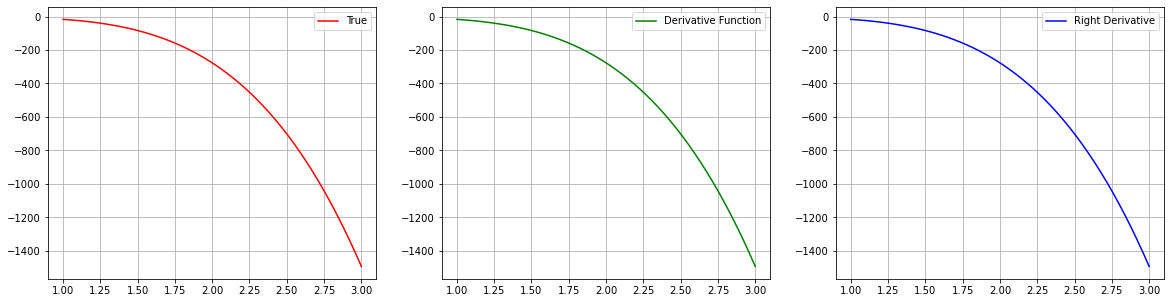

In [8]:
a = 1.
b = 3.
h = 0.0001
x_data = np.linspace(a, b)
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].plot(x_data, df1_an(x_data), color='r', label='True')
axes[1].plot(x_data, df(x_data, h), color='g', label='Derivative Function')
axes[2].plot(x_data, r_derivative(x_data, h), color='b', label='Right Derivative')
for ax in axes:
    ax.grid()
    ax.legend()

In [9]:
# def optimize_h(t, h, der_function):
#     df2_ = df2_an(t) # точное значение производной функции f2 в точке t
#     h_err = {} # для сохранения погрешностей при заданном шаге
#     for i in range(20):
#         der = der_function(t, h, f2)
#         h_err.update({h: np.abs(der - df2_)})
#         h /= 10
#     return h_err

In [10]:
# вариант с выходом из цикла
def optimize_h2(t, h, der_function):
    df2_ = df2_an(t) # точное значение производной функции f2 в точке t
    h_err = {h: np.abs(der_function(t, h, f2) - df2_)} # для сохранения погрешностей при заданном шаге
    h_pred = h
    h /= 10
    for i in range(20):
        der = der_function(t, h, f2)
        h_err.update({h: np.abs(der - df2_)})
        # если погрешность не уменьшается, то фиксируем шаг
        if h_err[h] / h_err[h_pred] >= 0.5:
            break     
        h_pred = h
        h /= 10
    return h_err, h_pred

In [11]:
t = -2
h = 0.1
h_err_rd, h_opt_rd = optimize_h2(t, h, r_derivative) # вычисляем правой разностной производной
h_err_df, h_opt_df = optimize_h2(t, h, df) # вычисляем нашей формулой дифференцирования

In [12]:
h_err_rd

{0.1: 0.022192701981957885,
 0.01: 0.0021830155224911163,
 0.001: 0.0002179403194657592,
 0.0001: 2.179042003169762e-05,
 1e-05: 2.179009758185302e-06,
 1.0000000000000002e-06: 2.1787850068566428e-07,
 1.0000000000000002e-07: 2.0924936117161508e-08,
 1.0000000000000002e-08: 3.499970424591936e-09,
 1.0000000000000003e-09: 8.531787143439828e-08}

In [13]:
h_err_df

{0.1: 0.060365378769994815,
 0.01: 0.0006411798718264361,
 0.001: 6.418522388029757e-06,
 0.0001: 6.418921727480154e-08,
 1e-05: 6.411615682822003e-10,
 1.0000000000000002e-06: 1.6930135071646646e-10,
 1.0000000000000002e-07: 1.6930135071646646e-10}

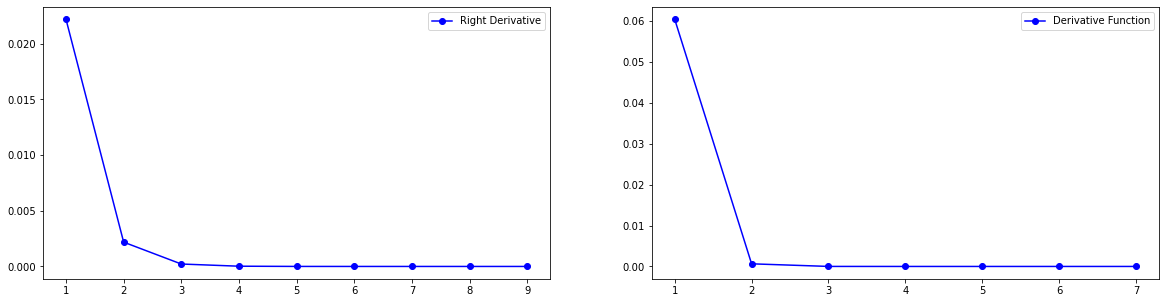

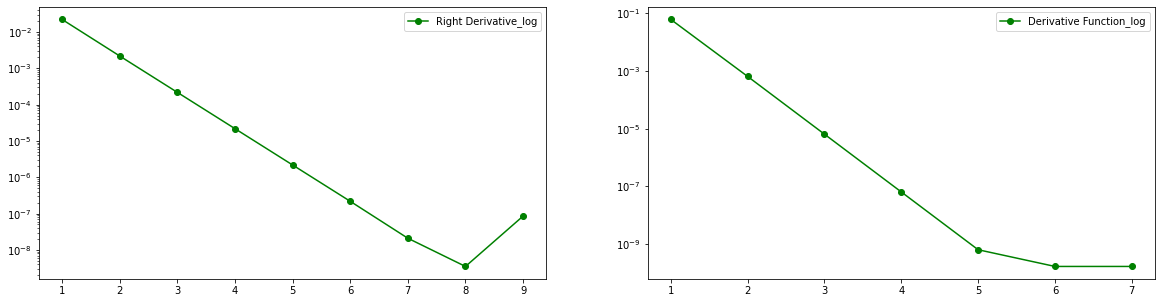

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig, axes_log = plt.subplots(1, 2, figsize=(20, 5))
for h_err_d, name, ax, ax_log in zip(
[h_err_rd, h_err_df], ['Right Derivative', 'Derivative Function'], axes, axes_log):
    ax_log.plot(range(1, len(h_err_d)+1), h_err_d.values(), label=name+'_log', color='g', marker='o')
    #ax_log.plot(h_err_d.keys(), h_err_d.values(), label=name+'_log', color='g', marker='o')
    
    ax_log.set_yscale('log')
    ax_log.legend()
    
    ax.plot(range(1, len(h_err_d)+1), h_err_d.values(), label=name, color='b', marker='o')
    ax.set_yscale('linear')
    ax.legend()    
    # ax_log.set_xlim(0, 10**-10)

Для функции правой разностной производной оптимальным шагом является $h=10^{-8}$ $\\$
Для нашей функции численного дифференцирования - $h = 10^{-6}$. $\newline$

In [15]:
# h_opt_rd = 10**-8
# h_opt_df = 10**-6

Приведем таблицу погрешностей от шага дифференцирования для метода правой производной и нашей функции.

In [16]:
import pandas as pd
d = {'h': pd.Series(h_err_rd.keys()), 
     'r_derivative err': pd.Series(h_err_rd.values()),
     'def_func err': pd.Series(h_err_df.values())}
h_err_data = pd.DataFrame(d)
h_err_data

,h,r_derivative err,def_func err
0,1.000000e-01,2.219270e-02,6.036538e-02
1,1.000000e-02,2.183016e-03,6.411799e-04
2,1.000000e-03,2.179403e-04,6.418522e-06
3,1.000000e-04,2.179042e-05,6.418922e-08
4,1.000000e-05,2.179010e-06,6.411616e-10
5,1.000000e-06,2.178785e-07,1.693014e-10
6,1.000000e-07,2.092494e-08,1.693014e-10
7,1.000000e-08,3.499970e-09,NaN
8,1.000000e-09,8.531787e-08,NaN


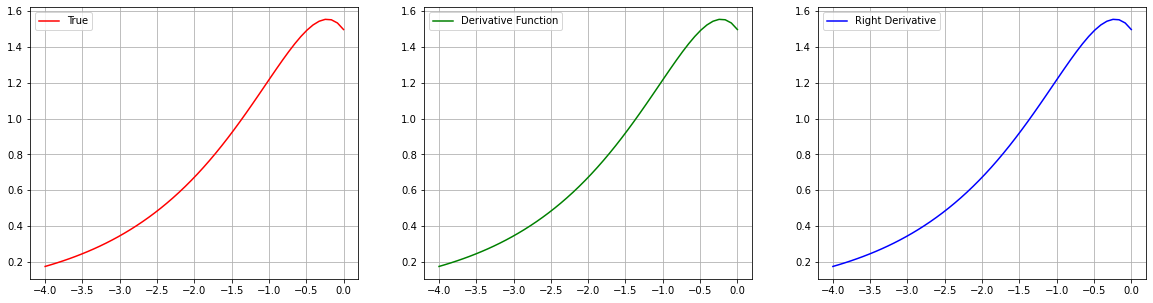

In [17]:
x_data = np.linspace(-4, 0)
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].plot(x_data, df2_an(x_data), color='r', label='True')
axes[1].plot(x_data, df(x_data, h_opt_df, f2), color='g', label='Derivative Function')
axes[2].plot(x_data, r_derivative(x_data, h_opt_rd, f2), color='b', label='Right Derivative')
for ax in axes:
    ax.grid()
    ax.legend()

## Задание 6.2
Найти приближенное решение задачи Коши для обыкновенного дифференциального уравнения 1 порядка с точностью $eps = 10^{-6}$
$$y'(t) = r(t)y(t), t \in [t_0, T]$$
$$y(t_0) = y_0$$
$$r(t) = \frac{1}{3}ctg(\frac{1}{3}t), y_0 = 1, t_0 = \frac{3\pi}{2}, T = 2\pi$$

### Найдем аналитическое решение
$$y'(t) = y(t)\frac{1}{3}ctg(\frac{1}{3}t)$$
$$\int \frac{dy}{y} = \frac{1}{3}\int ctg(\frac{t}{3})dt$$
$$ln{C_1y} = \frac{1}{3}\int\frac{cos{\frac{t}{3}}}{sin{\frac{t}{3}}} = \int \frac{dsin{\frac{t}{3}}}{sin{\frac{t}{3}}} = ln{C_2sin{\frac{t}{3}}}$$
$$C_1y = C_2sin{\frac{t}{3}}$$
$$y(t) = Csin{\frac{t}{3}}$$
$$y(t_0) = y(\frac{3\pi}{2}) = 1 = Csin{\frac{\frac{3\pi}{2}}{3}} \Rightarrow C = 1$$
$$y(t) = sin{\frac{t}{3}}$$

In [18]:
t_0 = 3 * np.pi / 2
T = 2 * np.pi
y_0 = 1
h = 0.1
eps = 1e-6
def func(t):
    return np.sin(t / 3)
def f(t, y):
    return 1 / 3 * np.cos(t/3) / np.sin(t/3) * y

In [19]:
# метод Эйлера с использованием правила Рунге для апостериорной оценки погрешности
def Euler(t_0, T, y_0, h, eps=1e-6):
    n = int((T - t_0) / h) + 1
    h = (T - t_0) / (n - 1)
    y = np.zeros(n) # массив приближенных решений
    y[0] = y_0
    for i in range(n - 1):
        y[i+1] = y[i] + h * f((t_0 + i * h), y[i])
    
    while True:
        # уменьшаем шаг вдвое
        n_ = 2 * n - 1
        h_ = (T - t_0) / (n_ - 1)
        y_ = np.zeros(n_)
        y_[0] = y_0
        
        for j in range(n_ - 1):
            y_[j + 1] = y_[j] + h_ * f((t_0 + j * h_), y_[j])
        if np.max([np.abs(y[i] - y_[2*i]) for i in range(n)]) <= eps:
            break
        h /= 2
        n = int((T - t_0) / h) + 1
        h = (T - t_0) / (n - 1)
        y = y_
    return y_

In [20]:
%time y_euler = Euler(t_0, T, y_0, h)
n_euler = len(y_euler)
h_euler = (T - t_0) / (n_euler - 1)
print('Метод Эйлера: \n\t шаг интегрирования: {:0.7f} \n\t количество узлов {}'.format(h_euler, n_euler))

Wall time: 931 ms
Метод Эйлера: 
	 шаг интегрирования: 0.0000128 
	 количество узлов 122881


In [21]:
# метод Эйлера-Коши
def Euler_Cauchy(t_0, T, y_0, h, eps=1e-6):
    n = int((T - t_0) / h) + 1
    h = (T - t_0) / (n - 1)
    y = np.zeros(n) # массив приближенных решений
    y[0] = y_0
    for i in range(n - 1):
            y[i + 1] = y[i] + h / 2 * (f(t_0 + i*h, y[i]) 
                                +  f(t_0 + (i + 1)*h, y[i] + h * f(t_0 + i*h, y[i])))
    while True:
        n_ = 2 * n - 1
        h_ = (T - t_0) / (n_ - 1)
        y_ = np.zeros(n_)
        y_[0] = y_0
        
        for i in range(n_ - 1):
            y_[i + 1] = y_[i] + h_ / 2 * (f(t_0 + i*h_, y_[i]) 
                                +  f(t_0 + (i + 1)*h_, y_[i] + h_ * f(t_0 + i*h_, y_[i])))
 
            
        if np.max([np.abs(y[i] - y_[2*i]) / 3 for i in range(n)]) / 3 <= eps:
            break
        h /= 2
        n = int((T - t_0) / h) + 1
        h = (T - t_0) / (n - 1)
        y = y_
    return y_

In [22]:
%time y_euler_cauchy = Euler_Cauchy(t_0, T, y_0, h)
n_euler_cauchy = len(y_euler_cauchy)
h_euler_cauchy = (T - t_0) / (n_euler_cauchy - 1)
print('Метод Эйлера-Коши: \n\t шаг интегрирования: {:0.7f} \n\t количество узлов {}'.format(h_euler_cauchy, n_euler_cauchy))

Wall time: 989 µs
Метод Эйлера-Коши: 
	 шаг интегрирования: 0.0261799 
	 количество узлов 61


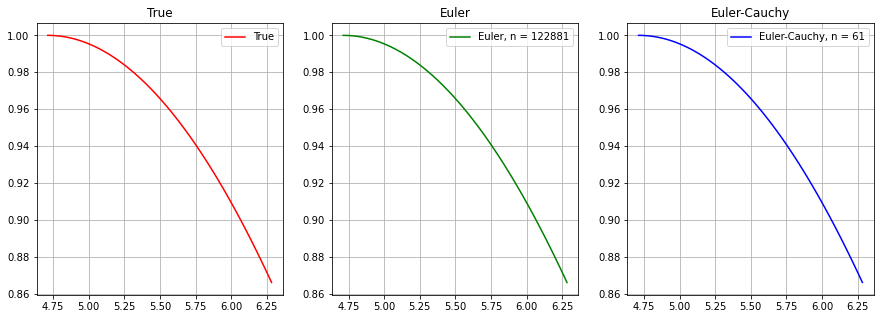

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
t_euler = np.linspace(t_0, T, len(y_euler))
t_euler_cauchy = np.linspace(t_0, T, len(y_euler_cauchy))

axes[0].plot(t_euler_cauchy, func(t_euler_cauchy), label='True', color='r')
axes[1].plot(t_euler, y_euler, label=f'Euler, n = {n_euler}', color='g')
axes[2].plot(t_euler_cauchy, y_euler_cauchy, label=f'Euler-Cauchy, n = {n_euler_cauchy}', color='b')


for ax, name in zip(axes, ['True', 'Euler', 'Euler-Cauchy']):
    ax.legend()
    ax.grid()
    ax.set_title(name)

|метод|число узлов|шаг|точность|
|-----|-----------|---|--------|
|метод Эйлера|122881|0.0000128  |$10^{-6}$|
|метод Эйлера-Коши|61|0.026|$10^{-6}$|